In [1]:
!pip install meteostat
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# mlb_final.xlsx
!gdown 1Tksg1jCib2rW9EXDa3Nd8tiud7fQ8w7z

Downloading...
From: https://drive.google.com/uc?id=1Tksg1jCib2rW9EXDa3Nd8tiud7fQ8w7z
To: /content/mlb_final.xlsx
100% 12.3M/12.3M [00:00<00:00, 26.6MB/s]


In [4]:
df = pd.read_excel('/content/mlb_final.xlsx')

In [5]:
df

,id,ball_type,pitch_type,velocity,exit_velocity,hit_dist,zone_num,pitcher_hand,batter_hand,ball,...,temp,wind,rain,theta_p,theta_n,distance,player_age,slg_percent,isolated_power,babip
0,676356,0,2,91.2,88.5,3,14,0,0,1,...,23.0,0.0,0,115.306158,-25.306158,91.654771,24,0.429,0.167,0.281
1,676356,1,2,86.3,105.0,228,9,0,0,0,...,21.3,11.6,0,103.751442,-13.751442,189.305002,24,0.429,0.167,0.281
2,676356,0,1,95.7,91.9,100,8,0,0,0,...,23.0,0.0,0,41.540762,48.459238,96.804764,24,0.429,0.167,0.281
3,676356,0,5,83.3,80.7,208,6,0,0,1,...,23.0,0.0,0,91.562115,-1.562115,168.446016,24,0.429,0.167,0.281
4,676356,0,2,91.2,88.5,3,14,0,0,1,...,23.0,0.0,0,116.408340,-26.408340,92.322138,24,0.429,0.167,0.281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109966,642715,0,0,92.4,100.8,322,5,1,0,2,...,23.0,0.0,0,99.972083,-9.972083,267.276979,27,0.407,0.190,0.259
109967,642715,1,1,91.1,107.9,132,8,0,0,0,...,23.0,0.0,0,89.227987,0.772013,123.021411,27,0.407,0.190,0.259
109968,642715,1,0,97.6,93.1,37,5,1,0,0,...,23.0,0.0,0,120.295679,-30.295679,94.973338,27,0.407,0.190,0.259
109969,642715,0,0,93.7,54.6,1,4,0,0,1,...,23.0,0.0,0,85.262096,4.737904,24.213715,27,0.407,0.190,0.259


In [6]:
# 야구 경기장.png
!gdown 1y142MkXqHP3nSjKcPwoYj8PJyUlyKD1V

Downloading...
From: https://drive.google.com/uc?id=1y142MkXqHP3nSjKcPwoYj8PJyUlyKD1V
To: /content/야구 경기장.png
100% 5.59M/5.59M [00:00<00:00, 123MB/s]


## 양수

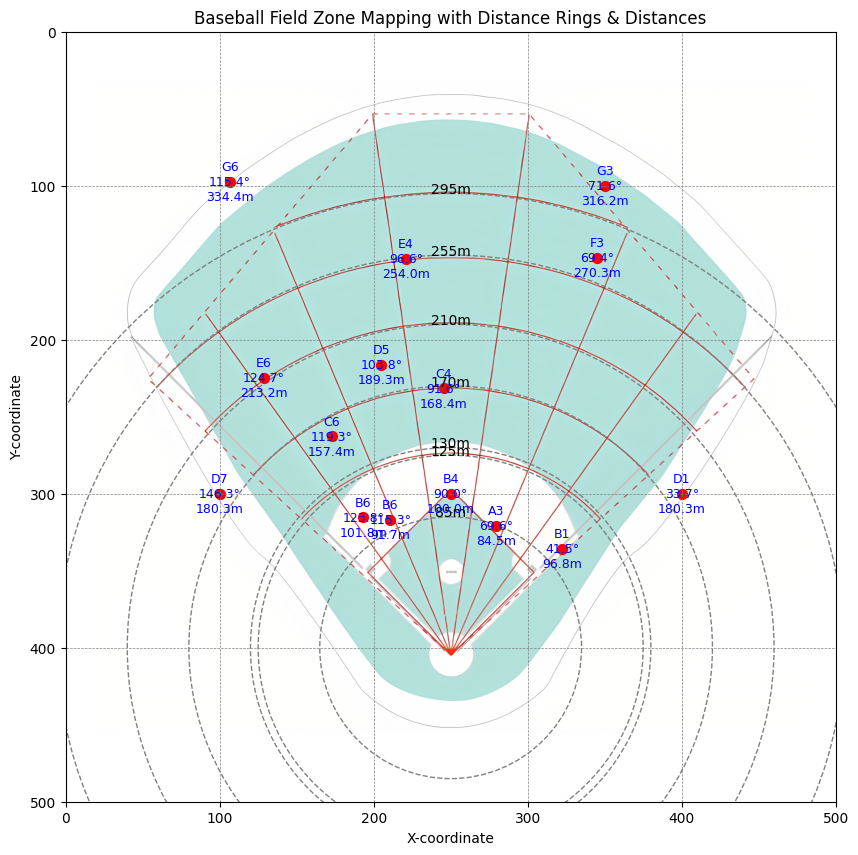

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 이미지 파일 경로
image_path = '야구 경기장.png'  # 이미지 경로

# 이미지 불러오기
img = mpimg.imread(image_path)

# 홈플레이트 중심 좌표
home_x, home_y = 250, 400

# 영역 계산 함수
def assign_zone(cx, cy):
    # 중심점을 기준으로 변환 (홈플레이트 기준 좌표: (250, 442))
    rel_x = cx - home_x
    rel_y = home_y - cy  # Y축 반전 (이미지 좌표계 반영)

    # 각도 계산 (위쪽을 기준으로 각도 조정)
    theta = np.degrees(np.arctan2(rel_y, rel_x))  # 기본 각도 계산 (-180 ~ 180)
    theta = (theta) % 360  # 위쪽(센터 필드 방향)을 0도로 설정

    # 거리 계산 (홈플레이트에서 공의 위치까지)
    distance = np.sqrt(rel_x**2 + rel_y**2)

    # 각도 구역
    if theta < 55:
        angle_zone = '1'
    elif 55 <= theta < 68:
        angle_zone = '2'
    elif 68 <= theta < 81.5:
        angle_zone = '3'
    elif 81.5 <= theta < 98.5:
        angle_zone = '4'
    elif 98.5 <= theta < 112:
        angle_zone = '5'
    elif 112 <= theta < 125:
        angle_zone = '6'
    else:
        angle_zone = '7'

    # 거리 구역
    if distance < 85:
        distance_zone = 'A'
    elif 85 <= distance < 125:
        distance_zone = 'B'
    elif 125 <= distance < 170:
        distance_zone = 'C'
    elif 170 <= distance < 210:
        distance_zone = 'D'
    elif 210 <= distance < 255:
        distance_zone = 'E'
    elif 255 <= distance < 295:
        distance_zone = 'F'
    else:
        distance_zone = 'G'

    return f"{distance_zone}{angle_zone}", theta, distance

# 테스트 좌표 (cx, cy)
coordinates = [(210.8217073,   317.1407317),(400,300),(100,300),(250, 300),(350,100),
(205.0002439,   216.1212195),
(322.4568293,   335.8036585),
(245.4080488,   231.6165854),
(193.3573171,   315.4285366),
(172.8965854,   262.7785366),
(220.9236585,   147.6334146),
(279.4807317,   320.8219512),
(128.6363415,   224.6821951),
(106.7202439,   97.80853659),
(345.1434146,   146.9485366)]

# 이미지 출력
plt.figure(figsize=(10, 10))
plt.imshow(img, extent=[0, 500, 500, 0])  # 좌표계를 (0,0) ~ (500,500)로 설정
plt.axis('on')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 거리 구역 원 추가
distance_radii = [85, 125, 130, 170, 210, 255, 295]

for radius in distance_radii:
    circle = plt.Circle((home_x, home_y), radius, color='gray', fill=False, linestyle='dashed', linewidth=1)
    plt.gca().add_patch(circle)  # 원 추가
    plt.text(home_x, home_y - radius, f"{radius}m", color='black', fontsize=10, ha='center')

# 좌표 찍기 및 영역 + 거리 출력
for cx, cy in coordinates:
    zone, theta, distance = assign_zone(cx, cy)
    plt.scatter(cx, cy, c='red', s=50)  # 좌표 표시
    # 영역 정보, 각도, 거리 출력
    plt.text(cx, cy, f"{zone}\n{theta:.1f}°\n{distance:.1f}m",
             color='blue', fontsize=9, ha='center', va='center')

plt.title("Baseball Field Zone Mapping with Distance Rings & Distances")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.xlim(0, 500)
plt.ylim(500, 0)  # Y축 방향을 상단 0, 하단 500으로 설정
plt.show()

#cx, cy

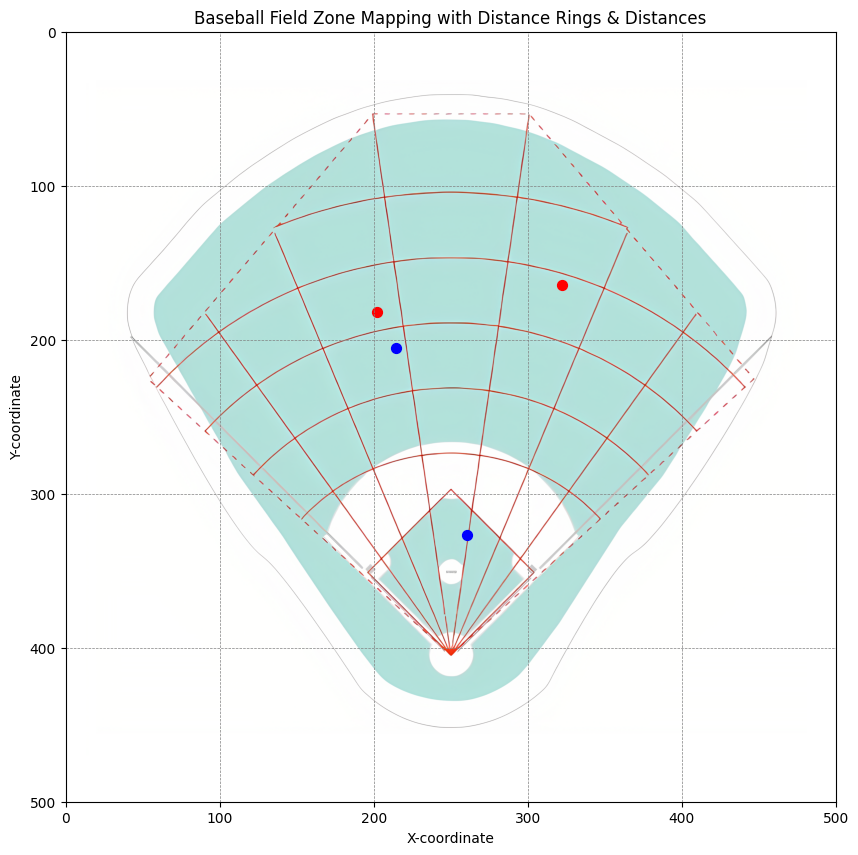

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 이미지 파일 경로
image_path = '야구 경기장.png'  # 이미지 경로

# 이미지 불러오기
img = mpimg.imread(image_path)

# 홈플레이트 중심 좌표
home_x, home_y = 250, 400

# 테스트 좌표 (cx, cy)
coordinates = [(202.089512, 182.003171), (322.456829, 164.196341) ]
pred = [(260.84357, 326.53894), (214.64018, 205.15031)]

# 이미지 출력
plt.figure(figsize=(10, 10))
plt.imshow(img, extent=[0, 500, 500, 0])  # 좌표계를 (0,0) ~ (500,500)로 설정
plt.axis('on')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 거리 구역 원 추가
# distance_radii = [85, 125, 130, 170, 210, 255, 295]


# 좌표 찍기 및 영역 + 거리 출력
for cx, cy in coordinates:
    zone, theta, distance = assign_zone(cx, cy)
    plt.scatter(cx, cy, c='red', s=50)  # 좌표 표시
    # 영역 정보, 각도, 거리 출력

# 좌표 찍기 및 영역 + 거리 출력
for cx, cy in pred:
    zone, theta, distance = assign_zone(cx, cy)
    plt.scatter(cx, cy, c='blue', s=50)  # 좌표 표시
    # 영역 정보, 각도, 거리 출력

plt.title("Baseball Field Zone Mapping with Distance Rings & Distances")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.xlim(0, 500)
plt.ylim(500, 0)  # Y축 방향을 상단 0, 하단 500으로 설정
plt.show()

#양수 : 좌표구역 4등분

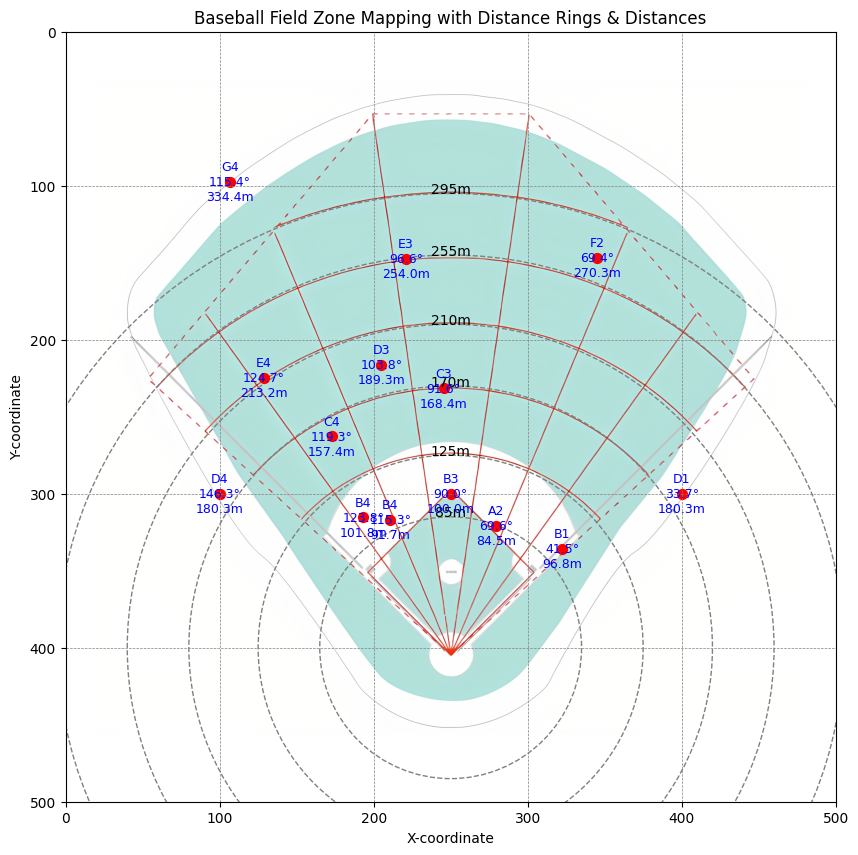

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 이미지 파일 경로
image_path = '야구 경기장.png'  # 이미지 경로

# 이미지 불러오기
img = mpimg.imread(image_path)

# 홈플레이트 중심 좌표
home_x, home_y = 250, 400

# 영역 계산 함수
def assign_zone(cx, cy):
    # 중심점을 기준으로 변환 (홈플레이트 기준 좌표: (250, 442))
    rel_x = cx - home_x
    rel_y = home_y - cy  # Y축 반전 (이미지 좌표계 반영)

    # 각도 계산 (위쪽을 기준으로 각도 조정)
    theta = np.degrees(np.arctan2(rel_y, rel_x))  # 기본 각도 계산 (-180 ~ 180)
    theta = (theta) % 360  # 위쪽(센터 필드 방향)을 0도로 설정

    # 거리 계산 (홈플레이트에서 공의 위치까지)
    distance = np.sqrt(rel_x**2 + rel_y**2)

    # 각도 구역
    if theta < 68:
        angle_zone = '1'
    elif 68 <= theta < 90:
        angle_zone = '2'
    elif 90 <= theta < 112:
        angle_zone = '3'
    else:
        angle_zone = '4'

    # 거리 구역
    if distance < 85:
        distance_zone = 'A'
    elif 85 <= distance < 125:
        distance_zone = 'B'
    elif 125 <= distance < 170:
        distance_zone = 'C'
    elif 170 <= distance < 210:
        distance_zone = 'D'
    elif 210 <= distance < 255:
        distance_zone = 'E'
    elif 255 <= distance < 295:
        distance_zone = 'F'
    else:
        distance_zone = 'G'

    return f"{distance_zone}{angle_zone}", theta, distance

# 테스트 좌표 (cx, cy)
coordinates = [(210.8217073,   317.1407317),(400,300),(100,300),(250, 300),
(205.0002439,   216.1212195),
(322.4568293,   335.8036585),
(245.4080488,   231.6165854),
(193.3573171,   315.4285366),
(172.8965854,   262.7785366),
(220.9236585,   147.6334146),
(279.4807317,   320.8219512),
(128.6363415,   224.6821951),
(106.7202439,   97.80853659),
(345.1434146,   146.9485366)]

# 이미지 출력
plt.figure(figsize=(10, 10))
plt.imshow(img, extent=[0, 500, 500, 0])  # 좌표계를 (0,0) ~ (500,500)로 설정
plt.axis('on')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 거리 구역 원 추가
distance_radii = [85, 125, 170, 210, 255, 295]

for radius in distance_radii:
    circle = plt.Circle((home_x, home_y), radius, color='gray', fill=False, linestyle='dashed', linewidth=1)
    plt.gca().add_patch(circle)  # 원 추가
    plt.text(home_x, home_y - radius, f"{radius}m", color='black', fontsize=10, ha='center')

# 좌표 찍기 및 영역 + 거리 출력
for cx, cy in coordinates:
    zone, theta, distance = assign_zone(cx, cy)
    plt.scatter(cx, cy, c='red', s=50)  # 좌표 표시
    # 영역 정보, 각도, 거리 출력
    plt.text(cx, cy, f"{zone}\n{theta:.1f}°\n{distance:.1f}m",
             color='blue', fontsize=9, ha='center', va='center')

plt.title("Baseball Field Zone Mapping with Distance Rings & Distances")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.xlim(0, 500)
plt.ylim(500, 0)  # Y축 방향을 상단 0, 하단 500으로 설정
plt.show()

## 음수 : 거리 구역 원 O

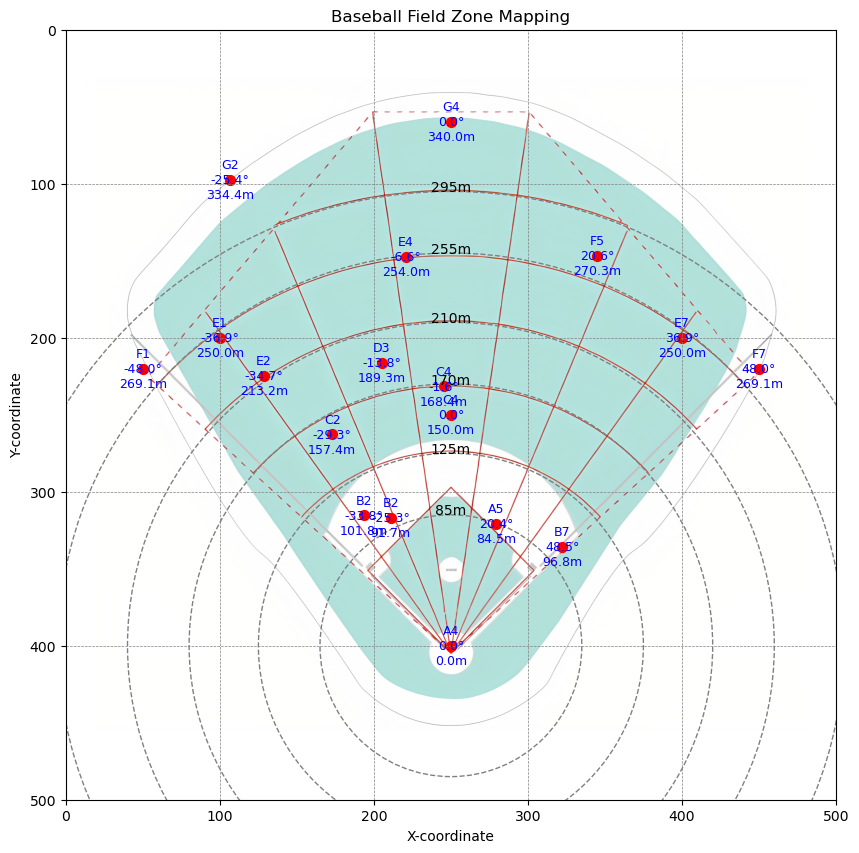

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 이미지 파일 경로
image_path = '야구 경기장.png'  # 이미지 경로

# 이미지 불러오기
img = mpimg.imread(image_path)

# 홈플레이트 중심 좌표
home_x, home_y = 250, 400

# 영역 계산 함수
def assign_zone(cx, cy):
    # 중심점을 기준으로 변환
    rel_x = cx - home_x
    rel_y = home_y - cy  # Y축 반전 (이미지 좌표계 반영)

    # 각도 계산 (홈플레이트 위쪽을 0도로 기준, 왼쪽은 +, 오른쪽은 -)
    theta = np.degrees(np.arctan2(rel_x, rel_y))  # X 축을 기준으로 한 각도

    distance = np.sqrt(rel_x**2 + rel_y**2)

    # 각도 구역
    if theta < -35.71:
        angle_zone = '1'
    elif -35.71 <= theta < -21.43:
        angle_zone = '2'
    elif -21.43 <= theta < -7.14:
        angle_zone = '3'
    elif -7.14 <= theta < 7.14:
        angle_zone = '4'
    elif 7.14 <= theta < 21.43:
        angle_zone = '5'
    elif 21.43 <= theta < 35.71:
        angle_zone = '6'
    else:
        angle_zone = '7'

    # 거리 구역
    if distance < 85:
        distance_zone = 'A'
    elif 85 <= distance < 125:
        distance_zone = 'B'
    elif 125 <= distance < 170:
        distance_zone = 'C'
    elif 170 <= distance < 210:
        distance_zone = 'D'
    elif 210 <= distance < 255:
        distance_zone = 'E'
    elif 255 <= distance < 295:
        distance_zone = 'F'
    else:
        distance_zone = 'G'

    return f"{distance_zone}{angle_zone}", theta, distance

# 테스트 좌표 (cx, cy)
coordinates = [(250,250), (250,400),(400,200),(100,200),(450,220),(50,220),(250,60),
(210.8217073,   317.1407317),
(205.0002439,   216.1212195),
(322.4568293,   335.8036585),
(245.4080488,   231.6165854),
(193.3573171,   315.4285366),
(172.8965854,   262.7785366),
(220.9236585,   147.6334146),
(279.4807317,   320.8219512),
(128.6363415,   224.6821951),
(106.7202439,   97.80853659),
(345.1434146,   146.9485366)]

# 이미지 출력
plt.figure(figsize=(10, 10))
plt.imshow(img, extent=[0, 500, 500, 0])  # 좌표계를 (0,0) ~ (500,500)로 설정
plt.axis('on')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 거리 구역 원 추가
distance_radii = [85, 125, 170, 210, 255, 295]

for radius in distance_radii:
    circle = plt.Circle((home_x, home_y), radius, color='gray', fill=False, linestyle='dashed', linewidth=1)
    plt.gca().add_patch(circle)  # 원 추가
    plt.text(home_x, home_y - radius, f"{radius}m", color='black', fontsize=10, ha='center')

# 좌표 찍기 및 영역 + 거리 출력
for cx, cy in coordinates:
    zone, theta, distance = assign_zone(cx, cy)
    plt.scatter(cx, cy, c='red', s=50)  # 좌표 표시
    # 영역 정보, 각도, 거리 출력
    plt.text(cx, cy, f"{zone}\n{theta:.1f}°\n{distance:.1f}m",
             color='blue', fontsize=9, ha='center', va='center')

plt.title("Baseball Field Zone Mapping")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.xlim(0, 500)
plt.ylim(500, 0)
plt.show()

## 음수 : 거리 구역 원 X

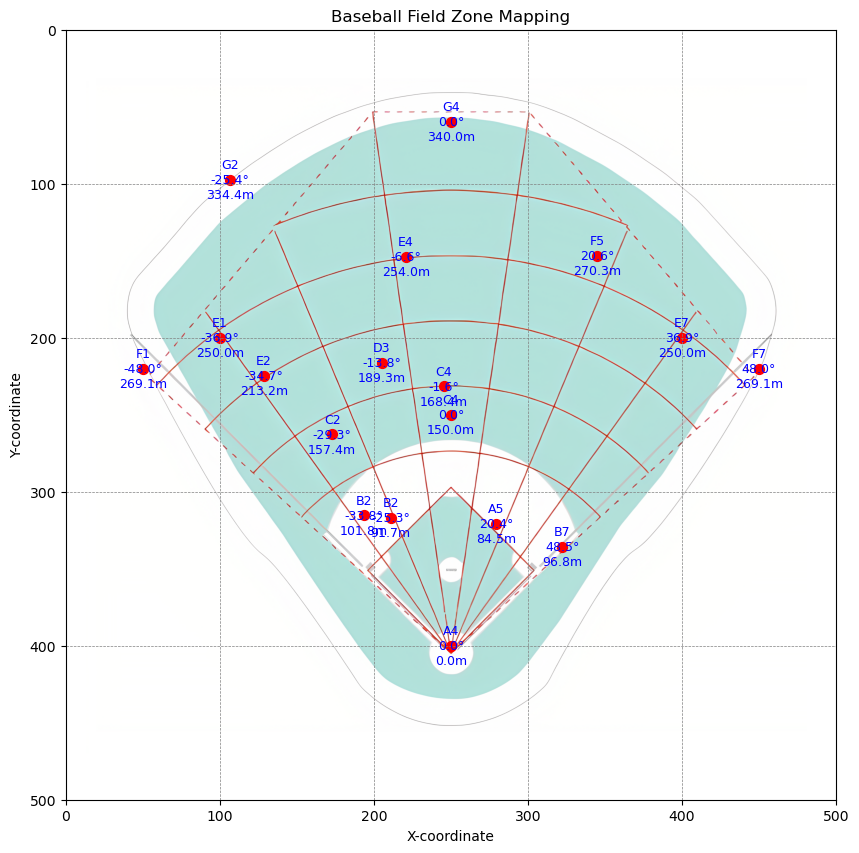

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 이미지 파일 경로
image_path = '야구 경기장.png'  # 이미지 경로

# 이미지 불러오기
img = mpimg.imread(image_path)

# 홈플레이트 중심 좌표
home_x, home_y = 250, 400

# 영역 계산 함수
def assign_zone(cx, cy):
    # 중심점을 기준으로 변환
    rel_x = cx - home_x
    rel_y = home_y - cy  # Y축 반전 (이미지 좌표계 반영)

    # 각도 계산 (홈플레이트 위쪽을 0도로 기준, 왼쪽은 +, 오른쪽은 -)
    theta = np.degrees(np.arctan2(rel_x, rel_y))  # X 축을 기준으로 한 각도

    distance = np.sqrt(rel_x**2 + rel_y**2)

    # 각도 구역
    if theta < -35.71:
        angle_zone = '1'
    elif -35.71 <= theta < -21.43:
        angle_zone = '2'
    elif -21.43 <= theta < -7.14:
        angle_zone = '3'
    elif -7.14 <= theta < 7.14:
        angle_zone = '4'
    elif 7.14 <= theta < 21.43:
        angle_zone = '5'
    elif 21.43 <= theta < 35.71:
        angle_zone = '6'
    else:
        angle_zone = '7'

    # 거리 구역
    if distance < 85:
        distance_zone = 'A'
    elif 85 <= distance < 125:
        distance_zone = 'B'
    elif 125 <= distance < 170:
        distance_zone = 'C'
    elif 170 <= distance < 210:
        distance_zone = 'D'
    elif 210 <= distance < 255:
        distance_zone = 'E'
    elif 255 <= distance < 295:
        distance_zone = 'F'
    else:
        distance_zone = 'G'

    return f"{distance_zone}{angle_zone}", theta, distance

# 테스트 좌표 (cx, cy)
coordinates = [(250,250), (250,400),(400,200),(100,200),(450,220),(50,220),(250,60),
(210.8217073,   317.1407317),
(205.0002439,   216.1212195),
(322.4568293,   335.8036585),
(245.4080488,   231.6165854),
(193.3573171,   315.4285366),
(172.8965854,   262.7785366),
(220.9236585,   147.6334146),
(279.4807317,   320.8219512),
(128.6363415,   224.6821951),
(106.7202439,   97.80853659),
(345.1434146,   146.9485366)]

# 이미지 출력
plt.figure(figsize=(10, 10))
plt.imshow(img, extent=[0, 500, 500, 0])  # 좌표계를 (0,0) ~ (500,500)로 설정
plt.axis('on')
plt.grid(color='gray', linestyle='--', linewidth=0.5)


# 좌표 찍기 및 영역 + 거리 출력
for cx, cy in coordinates:
    zone, theta, distance = assign_zone(cx, cy)
    plt.scatter(cx, cy, c='red', s=50)  # 좌표 표시
    # 영역 정보, 각도, 거리 출력
    plt.text(cx, cy, f"{zone}\n{theta:.1f}°\n{distance:.1f}m",
             color='blue', fontsize=9, ha='center', va='center')

plt.title("Baseball Field Zone Mapping")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.xlim(0, 500)
plt.ylim(500, 0)
plt.show()

#회귀 성능 변환 (m, ft)